In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os
import csv

plt.style.use("default")
plt.rcParams["axes.titlesize"]=18
plt.rcParams["axes.labelsize"]=16
plt.rcParams["font.family"]="Arial"
plt.rcParams["mathtext.fontset"]="stix"
plt.rcParams["figure.figsize"]= 8, 6
plt.rcParams["figure.dpi"]=100

In [40]:
# Class define
class Data:
    def __init__(self) -> None:
        # Parameter list
        self.location = "./Data/" 
        self.parameter = pd.read_excel("Parameter.xlsx", header=0) #This file is required
        self.parameter.sort_values(["Length", "Surface"], inplace=True, ignore_index=True)
        self.parameter.index += 1

    def readPower(self, cycle):
        path = self.location + str(cycle) + ".csv"
        df = pd.read_csv(path, usecols=[2], names=["data"])
        return df

    def readAE(self, cycle):
        path = self.location + str(cycle) + ".csv"
        df = pd.read_csv(path, usecols=[0], names=["data"])
        return df

    def readMic(self, cycle):
        path = self.location + str(cycle) + ".csv"
        df = pd.read_csv(path, usecols=[3], names=["data"])
        return df
    
    def readLVDT(self, cycle):
        path = self.location + str(cycle) + ".csv"
        df = pd.read_csv(path, usecols=[1], names=["data"])
        return df
    
    def readColume(self, cycle, colume):
        path = self.location + str(cycle) + ".csv"
        df = pd.read_csv(path, usecols=[colume], names=["data"])
        return df

[150650, 352130]


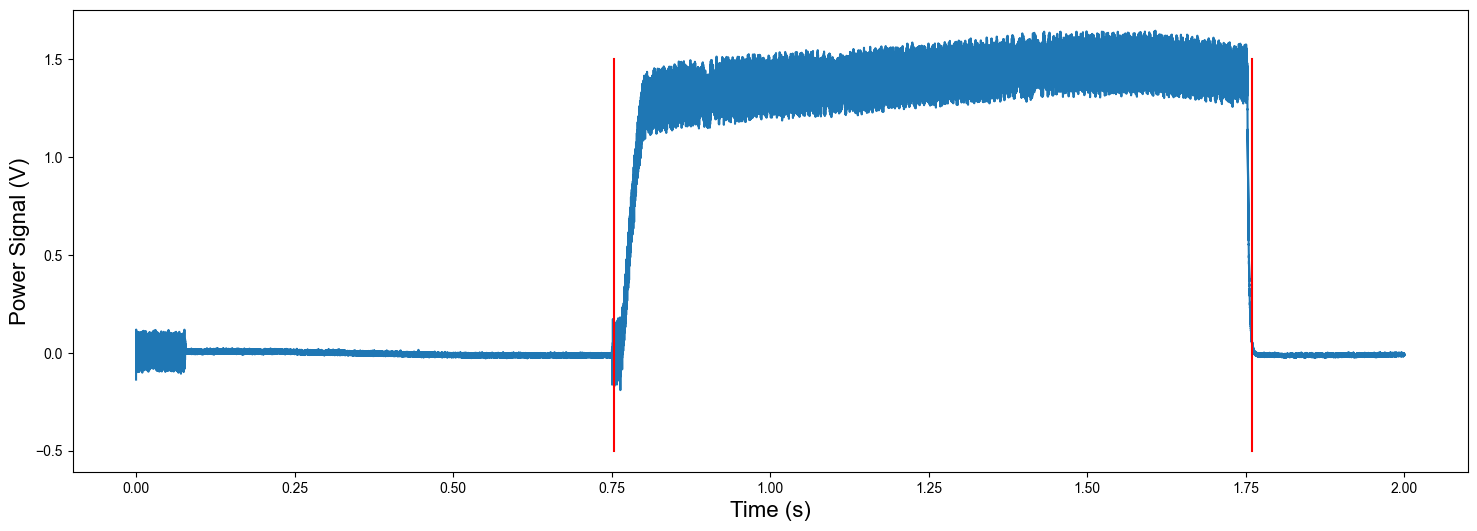

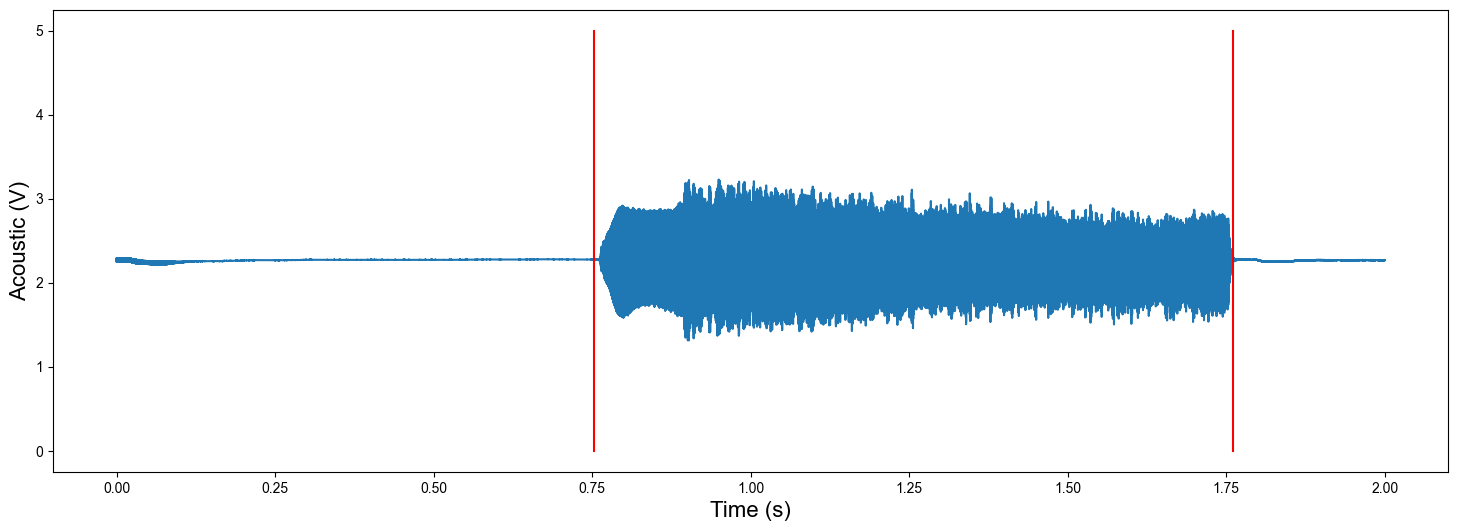

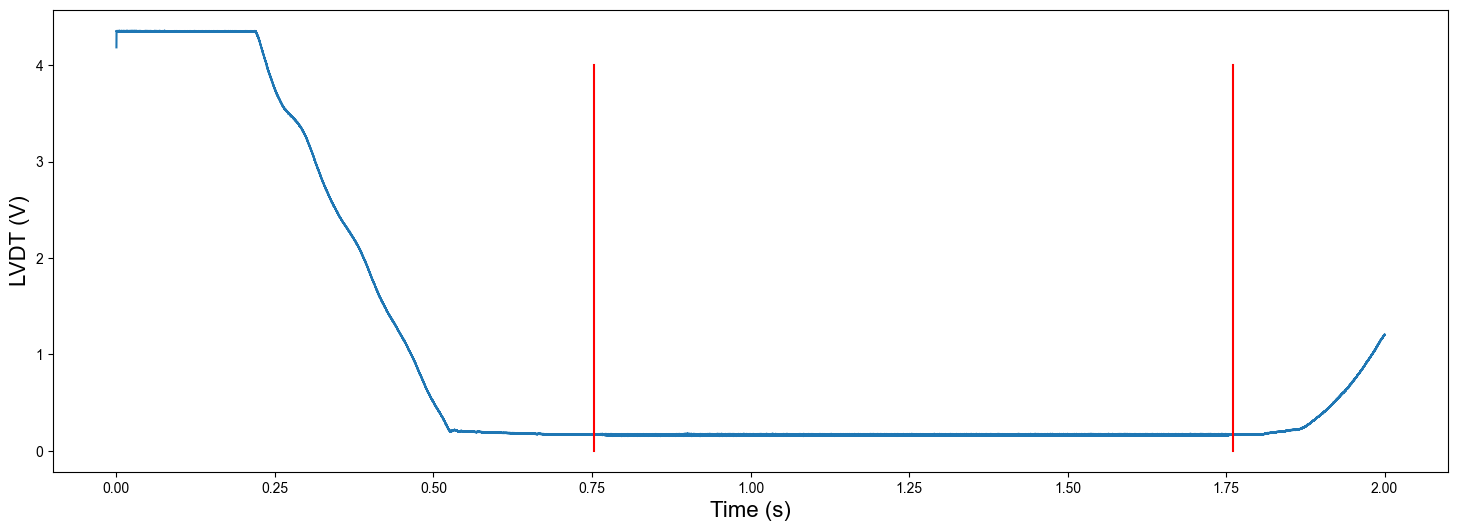

In [41]:
# Preprocessing 预处理
welding=Data()
welding = Data()
PM = welding.parameter
Fs = 200e3 # Sampling rate
T = 2 # Duration
N = int(T*Fs) # Sample size




def plotColume(cycle=13698, colume=2, vLine=[-1,-1]): #LDVT=1,AE=0,Power=2 绘制指定数据列的时域图
    labelTitle=["Acoustic (V)","LVDT (V)","Power Signal (V)"]
    plt.figure(figsize=(18, 6))
    plt.plot(np.linspace(0, T, N), welding.readColume(cycle,colume)["data"])
    if vLine!=[-1,-1]:
        if colume==2:
            plt.plot([vLine[0]/400000*2, vLine[0]/400000*2], [-0.5, 1.5], 'r')
            plt.plot([vLine[1]/400000*2, vLine[1]/400000*2], [-0.5, 1.5], 'r')
        if colume==0:
            plt.plot([vLine[0]/400000*2, vLine[0]/400000*2], [0, 5], 'r')
            plt.plot([vLine[1]/400000*2, vLine[1]/400000*2], [0, 5], 'r')
        if colume==1:
            plt.plot([vLine[0]/400000*2, vLine[0]/400000*2], [0, 4], 'r')
            plt.plot([vLine[1]/400000*2, vLine[1]/400000*2], [0, 4], 'r')
    plt.xlabel("Time (s)")
    plt.ylabel(labelTitle[colume])
    return


#寻找指定cycle的Main-weld的起始位置和终止位置
#Find main-weld start and end postion for specific cycle
#startPos: 起始搜寻位置，threshold：启动阈值，endCheck：结束检查采样数,step：步长
#The algorithm searches the start position of main-weld based on a threshold. If a sample's signal is higher than the threshold for the first time, then it is the start position. if a signal first fall below the threshold and the following signals do the same, then it is the end position.
def findMainWeld(cycle=13709,startPos=100000, threshold=0.04, endCheck=300,step=[10,1]):
    data=welding.readColume(cycle,2)["data"]
    pos=startPos
    startPos2=-1
    endPos=-1
    while endPos==-1:
        if data[pos]>=threshold and startPos2==-1:
            startPos2=pos
        if startPos2!=-1 and data[pos]<threshold:
            allBelow=1
            for i in range((pos), (pos) +endCheck,step[1]):
                if data[i]>=threshold:
                    allBelow=0
                    break
                    
            if allBelow==1:
                endPos=pos
        pos+=step[0]
        if pos>=399900:
            break
    return [startPos2,endPos]
cyc=13994
mw=findMainWeld(cycle=cyc)
plotColume(cycle=cyc,vLine=mw)
plotColume(cycle=cyc,vLine=mw,colume=0)
plotColume(cycle=cyc,vLine=mw,colume=1)
print(mw)


In [42]:
# ## 2.a
# for cycle in PM.Cycle:
#     pre_height, post_height = findMainWeld(cycle)
#     height_change = post_height - pre_height
#     pd.DataFrame({'Cycle': [cycle], 'Pre_Height': [pre_height], 'Post_Height': [post_height], 'Height_Change': [height_change]}).to_csv(
#         "result_a.csv", mode="a", index=False, header=None
#     )

In [43]:
# ## 2.b
# def calculate_features(cycle, step=1000):
#     data = welding.readPower(cycle)["data"]
#     rise_start, _ = findMainWeld(cycle)
#     rise_peak = -1
#     rise_peak_idx = 0
#     for i in range(rise_start, len(data) - step, step):
#         y_values = data[i:i+step]
#         rise_peak_idx = y_values.idxmax()       

#         if  y_values.max() <= rise_peak:
#             print(rise_peak_idx/Fs, rise_peak)
#             break
#         rise_peak = y_values.max()
#     rise_duration = rise_peak_idx - rise_start
#     rise_slope = (rise_peak - data.iloc[rise_start]) / rise_duration
#     return rise_peak, rise_slope, rise_duration

# for cycle in PM.Cycle:
#     rise_peak, rise_slope, rise_duration = calculate_features(cycle)
#     pd.DataFrame({'Cycle': [cycle], 'rise_peak': [rise_peak], 'rise_slope': [rise_slope], 'rise_duration': [rise_duration]}).to_csv(
#         "result_b.csv", mode="a", index=False, header=None
#     )


In [44]:
# plt.figure(figsize=(18, 6))
# plt.plot(np.linspace(0, T, N), welding.readPower(13994)["data"])
# plt.xlabel("Time (s)")
# plt.ylabel("Power Signal (V)")
# print(welding.readPower(13994)["data"])

In [45]:
# ## 2.c
# for cycle in PM.Cycle:
#     signal = welding.readAE(cycle)["data"]
#     AE = signal - np.mean(signal)
#     yf = np.fft.fft(AE)
#     yif = np.fft.ifft(yf) # Inverse fft
#     yf = yf/N # Normalize intensity
#     yf = yf[:N//2] # One side is enough since the fft is symmetric
    
#     xf = np.fft.fftfreq(N, 1/Fs)
#     xf = xf[:N//2]
#     power_sort = abs(yf)
#     power_sort.sort()
#     first_peak = power_sort[-1]
#     second_peak = power_sort[-2]
#     first_fre = xf[np.where(abs(yf) == first_peak)][0]
#     second_fre = xf[np.where(abs(yf) == second_peak)][0]
#     pd.DataFrame({'Cycle': [cycle], 'first_fre': [first_fre], 'first_peak': [first_peak], 'second_fre': [second_fre], 'second_peak': [second_peak]}).to_csv(
#         "result_c.csv", mode="a", index=False, header=None)

In [46]:
## 2.abc
def calculate_features(cycle, step=1000):
    data = welding.readPower(cycle)["data"]
    rise_start, _ = findMainWeld(cycle)
    rise_peak = -1
    rise_peak_idx = 0
    for i in range(rise_start, len(data) - step, step):
        y_values = data[i:i+step]
        rise_peak_idx = y_values.idxmax()       

        if  y_values.max() <= rise_peak:
            # print(rise_peak_idx/Fs, rise_peak)
            break
        rise_peak = y_values.max()
    rise_duration = (rise_peak_idx - rise_start) / Fs
    rise_slope = (rise_peak - data.iloc[rise_start]) / rise_duration
    return rise_peak, rise_slope, rise_duration

# clear
if os.path.exists("result_problem2.csv"):
    with open("result_problem2.csv", 'w') as file:
        # file.seek(0)
        file.truncate()

header = ['Cycle', 'Pre_Height', 'Post_Height', 'Height_Change', 
         'rise_peak', 'rise_slope', 'rise_duration',
         'first_peak_frequency', 'magnitude1', 'second_peak_frequency', 'magnitude2']
with open("result_problem2.csv", 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)

for cycle in PM.Cycle:
    # a
    pre_height, post_height = findMainWeld(cycle)
    height_change = post_height - pre_height
    
    # b
    rise_peak, rise_slope, rise_duration = calculate_features(cycle)
    
    # c
    signal = welding.readAE(cycle)["data"]
    AE = signal - np.mean(signal)
    yf = np.fft.fft(AE)
    yif = np.fft.ifft(yf) # Inverse fft
    yf = yf/N # Normalize intensity
    yf = yf[:N//2] # One side is enough since the fft is symmetric
    
    xf = np.fft.fftfreq(N, 1/Fs)
    xf = xf[:N//2]
    power_sort = abs(yf)
    power_sort.sort()
    first_peak = power_sort[-1]
    second_peak = power_sort[-2]
    first_fre = xf[np.where(abs(yf) == first_peak)][0]
    second_fre = xf[np.where(abs(yf) == second_peak)][0]
    
    # csv
    pd.DataFrame({'Cycle': [cycle], 'Pre_Height': [pre_height], 'Post_Height': [post_height], 'Height_Change': [height_change],
                  'rise_peak': [rise_peak], 'rise_slope': [rise_slope], 'rise_duration': [rise_duration],
                  'first_fre': [first_fre], 'first_peak': [first_peak], 'second_fre': [second_fre], 'second_peak': [second_peak]
                 }).to_csv("result_problem2.csv", mode="a", index=False, header=None)
    


    
    
    

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.